# Rotating Body Problem by Levy and Robinson
##  Geoff Cope
##  Univeristy of Utah
##  𐐏𐐭𐑌𐐲𐑂𐐲𐑉𐑅𐐮𐐻𐐨 𐐲𐑂 𐐏𐐭𐐻𐐫
##  December 30, 2021

There are two other metrics in this paper, metric 9 which has tensor components calculated in the appendix and metric 3 which is shen k is set equal to m to get Weyl's canonical coordinates.  We'll go back and do these another time.

https://www.cambridge.org/core/journals/mathematical-proceedings-of-the-cambridge-philosophical-society/article/abs/rotating-body-problem/BFCD29EC2C11E38FD0E2200B658D5456

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
r,phi,z,t,dr,dphi,dz,dt = symbols( 'r phi z t dr dphi dz dt' ) 

In [4]:
u = Function('u')(r,z)
u

In [5]:
a = Function('a')(r,z)
a

In [7]:
k = Function('k')(r,z)
k

In [8]:
m = Function('m')(r,z)
m

In [9]:
variables = Matrix( [r,phi,z,t] )
variables

⎡r⎤
⎢ ⎥
⎢φ⎥
⎢ ⎥
⎢z⎥
⎢ ⎥
⎣t⎦

In [10]:
differentials = Matrix( [dr,dphi,dz,dt] ) 
differentials

⎡ dr ⎤
⎢    ⎥
⎢dphi⎥
⎢    ⎥
⎢ dz ⎥
⎢    ⎥
⎣ dt ⎦

In [13]:
lineElement = expand(exp(2*u) * (dt + a*dphi)**2 - exp(-2*u) * ( exp(2*k)* dr**2 + exp(2*m)* dz**2 + r**2 *dphi**2 ) )
lineElement

In [14]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡  2⋅k(r, z)  -2⋅u(r, z)                                                                    
⎢-ℯ         ⋅ℯ                              0                                0              
⎢                                                                                           
⎢                            2  -2⋅u(r, z)    2        2⋅u(r, z)                            
⎢           0             - r ⋅ℯ           + a (r, z)⋅ℯ                      0             a
⎢                                                                                           
⎢                                                                   2⋅m(r, z)  -2⋅u(r, z)   
⎢           0                               0                     -ℯ         ⋅ℯ             
⎢                                                                                           
⎢                                            2⋅u(r, z)                                      
⎣           0                       a(r, z)⋅ℯ                         

In [15]:
import sympy

In [16]:
m = sympy.Array(g)
m

⎡  2⋅k(r, z)  -2⋅u(r, z)                                                                    
⎢-ℯ         ⋅ℯ                              0                                0              
⎢                                                                                           
⎢                            2  -2⋅u(r, z)    2        2⋅u(r, z)                            
⎢           0             - r ⋅ℯ           + a (r, z)⋅ℯ                      0             a
⎢                                                                                           
⎢                                                                   2⋅m(r, z)  -2⋅u(r, z)   
⎢           0                               0                     -ℯ         ⋅ℯ             
⎢                                                                                           
⎢                                            2⋅u(r, z)                                      
⎣           0                       a(r, z)⋅ℯ                         

In [17]:
from einsteinpy.symbolic import *

In [18]:
syms = sympy.symbols("r phi z t")
r,phi,z,t = syms

In [19]:
metric = MetricTensor(m,syms)

In [20]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢⎡∂             ∂                                                                           
⎢⎢──(k(r, z)) - ──(u(r, z))                                              0                  
⎢⎢∂r            ∂r                                                                          
⎢⎢                                                                                          
⎢⎢                                                                                          
⎢⎢                                                                                          
⎢⎢                           ⎛ 2 ∂                 ⎛        ∂         

In [21]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡                                                                                           
⎢                                                                                           
⎢                                      2                                                    
⎢   2⋅k(r, z) - 2⋅m(r, z) ⎛∂          ⎞     2⋅k(r, z) - 2⋅m(r, z) ∂           ∂             
⎢- ℯ                     ⋅⎜──(k(r, z))⎟  + ℯ                     ⋅──(k(r, z))⋅──(m(r, z)) + 
⎢                         ⎝∂z         ⎠                           ∂z          ∂z            
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

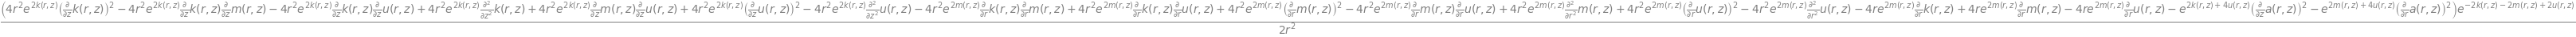

In [22]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [23]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                      2                                                    
⎢   2⋅k(r, z) - 2⋅m(r, z) ⎛∂          ⎞     2⋅k(r, z) - 2⋅m(r, z) ∂           ∂             
⎢- ℯ                     ⋅⎜──(k(r, z))⎟  + ℯ                     ⋅──(k(r, z))⋅──(m(r, z)) + 
⎢                         ⎝∂z         ⎠                           ∂z          ∂z            
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [24]:
# rm1 = RiemannCurvatureTensor.from_christoffels(ch)
# rm1.tensor()

In [25]:
# weyl = WeylTensor.from_metric(metric)
# weyl.tensor()

In [26]:
ricciSimplified = simplify(Ric.tensor())
ricciSimplified

⎡     ⎛                                      2                                              
⎢   2 ⎜   2⋅k(r, z) - 2⋅m(r, z) ⎛∂          ⎞     2⋅k(r, z) - 2⋅m(r, z) ∂           ∂       
⎢2⋅r ⋅⎜- ℯ                     ⋅⎜──(k(r, z))⎟  + ℯ                     ⋅──(k(r, z))⋅──(m(r, 
⎢     ⎜                         ⎝∂z         ⎠                           ∂z          ∂z      
⎢     ⎝                                                                                     
⎢───────────────────────────────────────────────────────────────────────────────────────────
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [27]:
einsteinSimplifed = simplify(einst.tensor())
einsteinSimplifed

⎡    ⎛                                           2                       2                  
⎢    ⎜     2  2⋅k(r, z) - 2⋅m(r, z) ⎛∂          ⎞         2 ⎛∂          ⎞          ∂        
⎢0.5⋅⎜2.0⋅r ⋅ℯ                     ⋅⎜──(u(r, z))⎟  - 2.0⋅r ⋅⎜──(u(r, z))⎟  + 2.0⋅r⋅──(m(r, z
⎢    ⎝                              ⎝∂z         ⎠           ⎝∂r         ⎠          ∂r       
⎢───────────────────────────────────────────────────────────────────────────────────────────
⎢                                                                                           
⎢                                                                                          r
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     